# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Matthew Block

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Import Required Libraries
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import sys
from urllib.parse import urljoin
from typing import List
import matplotlib.pyplot as plt
from textblob import TextBlob


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
%run nick-kuchar-scraper-multipage.py


Starting to scrape product links from multiple pages...
Fetching product links from: https://nickkuchar.com/collections/oahu
Fetching product links from: https://nickkuchar.com/collections/oahu?page=2
Fetching product links from: https://nickkuchar.com/collections/oahu?page=3
Fetching product links from: https://nickkuchar.com/collections/oahu?page=4
Fetching product links from: https://nickkuchar.com/collections/oahu?page=5
Fetching product links from: https://nickkuchar.com/collections/oahu?page=6
Fetching product links from: https://nickkuchar.com/collections/oahu?page=7
Fetching product links from: https://nickkuchar.com/collections/oahu?page=8
Found a total of 96 product links across all pages.
  Scraping details from: https://nickkuchar.com/collections/oahu/products/the-pick-3-choose-three-12x18-retro-travel-prints
  Scraping details from: https://nickkuchar.com/collections/oahu/products/see-oahus-north-shore-12x18-retro-travel-print
  Scraping details from: https://nickkuchar.co

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

try:
    # Read the HTML content from the file
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()

    # Use BeautifulSoup to parse the HTML and extract all text
    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()

    # Create a TextBlob object for NLP analysis
    blob = TextBlob(text_content)

    # Calculate sentiment polarity
    # Polarity is a float within the range [-1.0, 1.0]
    # where -1 is very negative, 0 is neutral, and +1 is very positive.
    polarity = blob.sentiment.polarity

    # Count the number of sentences
    num_sentences = len(blob.sentences)

    # Print the results with descriptive labels
    print(f"Sentiment Polarity Score: {polarity:.4f}")
    print(f"Number of Sentences: {num_sentences}")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Sentiment Polarity Score: 0.3079
Number of Sentences: 524


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [8]:

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

try:
    # --- Step 1: Read and extract text from the HTML file ---
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()

    # --- Step 2: Load the spaCy pipeline ---
    # This loads the small English model.
    nlp = spacy.load('en_core_web_sm')

    # --- Step 3: Process the text with spaCy ---
    doc = nlp(text_content)

    # --- Step 4: Find all tokens, excluding stop words and punctuation ---
    # We convert tokens to lower case and strip leading/trailing whitespace.
    # We also ensure the token is not an empty string after stripping.
    meaningful_tokens = [
        token.text.lower().strip() 
        for token in doc 
        if not token.is_stop and not token.is_punct and token.text.strip()
    ]

    # --- Step 5: Calculate the frequency of each token ---
    word_freq = Counter(meaningful_tokens)

    # --- Step 6: Get the 5 most common tokens ---
    most_common_tokens = word_freq.most_common(5)

    # --- Step 7: Print the results ---
    print("Top 5 Most Frequent Tokens and Their Frequencies:")
    print("-------------------------------------------------")
    for token, freq in most_common_tokens:
        print(f"Token: '{token}'\tFrequency: {freq}")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except ImportError:
    print("spaCy model 'en_core_web_sm' not found.")
    print("Please run the following command in a cell and restart the kernel:")
    print("!python -m spacy download en_core_web_sm")
except Exception as e:
    print(f"An error occurred: {e}")


Top 5 Most Frequent Tokens and Their Frequencies:
-------------------------------------------------
Token: 'print'	Frequency: 417
Token: 'nick'	Frequency: 132
Token: '12x18'	Frequency: 102
Token: 'travel'	Frequency: 99
Token: 'color'	Frequency: 97


In [ ]:
# A second version that uses only the descriptions from the HTML file, not the titles.

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

try:
    # --- Step 1: Read and extract text from the HTML file ---
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # --- MODIFICATION: Extract text ONLY from description <p> tags ---
    # Find all paragraph tags, which contain the descriptions.
    description_elements = soup.find_all('p')
    # Join the text from all description paragraphs into a single string.
    description_text = ' '.join([p.get_text(strip=True) for p in description_elements])

    # --- Step 2: Load the spaCy pipeline ---
    nlp = spacy.load('en_core_web_sm')

    # --- Step 3: Process the description text with spaCy ---
    doc = nlp(description_text)

    # --- Step 4: Find all tokens, excluding stop words and punctuation ---
    meaningful_tokens = [
        token.text.lower().strip() 
        for token in doc 
        if not token.is_stop and not token.is_punct and token.text.strip()
    ]

    # --- Step 5: Calculate the frequency of each token ---
    word_freq = Counter(meaningful_tokens)

    # --- Step 6: Get the 5 most common tokens ---
    most_common_tokens = word_freq.most_common(5)

    # --- Step 7: Print the results ---
    print("Top 5 Most Frequent Tokens (from descriptions only):")
    print("-----------------------------------------------------")
    for token, freq in most_common_tokens:
        print(f"Token: '{token}'\tFrequency: {freq}")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except ImportError:
    print("spaCy model 'en_core_web_sm' not found.")
    print("Please run the following command in a cell and restart the kernel:")
    print("!python -m spacy download en_core_web_sm")
except Exception as e:
    print(f"An error occurred: {e}")


Top 5 Most Frequent Tokens (from descriptions only):
-----------------------------------------------------
Token: 'print'	Frequency: 324
Token: 'nick'	Frequency: 130
Token: 'color'	Frequency: 97
Token: 'designed'	Frequency: 97
Token: 'sized'	Frequency: 95


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [10]:

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

try:
    # --- Step 1: Read and extract text from the HTML file's descriptions ---
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Extract text ONLY from description <p> tags
    description_elements = soup.find_all('p')
    description_text = ' '.join([p.get_text(strip=True) for p in description_elements])

    # --- Step 2: Load the spaCy pipeline ---
    nlp = spacy.load('en_core_web_sm')

    # --- Step 3: Process the description text with spaCy ---
    doc = nlp(description_text)

    # --- Step 4: Find all lemmas, excluding stop words and punctuation ---
    # A lemma is the base or dictionary form of a word (e.g., "prints" -> "print").
    # We convert lemmas to lower case for consistent counting.
    meaningful_lemmas = [
        token.lemma_.lower().strip() 
        for token in doc 
        if not token.is_stop and not token.is_punct and token.lemma_.strip()
    ]

    # --- Step 5: Calculate the frequency of each lemma ---
    lemma_freq = Counter(meaningful_lemmas)

    # --- Step 6: Get the 5 most common lemmas ---
    most_common_lemmas = lemma_freq.most_common(5)

    # --- Step 7: Print the results ---
    print("Top 5 Most Frequent Lemmas and Their Frequencies (from descriptions only):")
    print("-----------------------------------------------------------------------")
    for lemma, freq in most_common_lemmas:
        print(f"Lemma: '{lemma}'\tFrequency: {freq}")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except ImportError:
    print("spaCy model 'en_core_web_sm' not found.")
    print("Please run the following command in a cell and restart the kernel:")
    print("!python -m spacy download en_core_web_sm")
except Exception as e:
    print(f"An error occurred: {e}")


Top 5 Most Frequent Lemmas and Their Frequencies (from descriptions only):
-----------------------------------------------------------------------
Lemma: 'print'	Frequency: 436
Lemma: 'nick'	Frequency: 130
Lemma: 'design'	Frequency: 103
Lemma: 'color'	Frequency: 100
Lemma: 'sized'	Frequency: 95


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

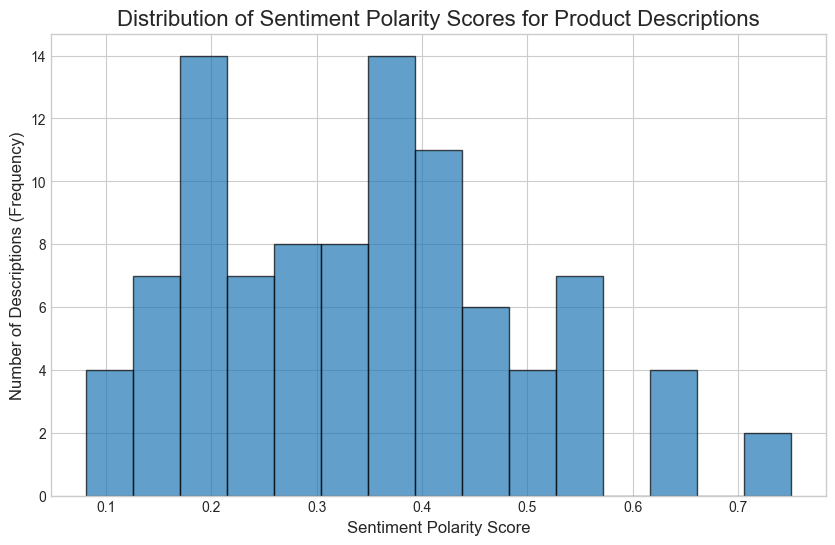

In [ ]:
### Since there were 96 descriptions, I decided to analyze the sentiment of each description and plot a histogram of the polarity scores rather than breaking it down by sentences.

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

# A list to hold the polarity score of each description
polarity_scores = []

try:
    # --- Step 1: Read and parse the HTML file ---
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')

    # --- Step 2: Find all product entries and calculate sentiment for each description ---
    # We iterate through each 'product-entry' div to process them one by one.
    product_entries = soup.find_all('div', class_='product-entry')
    
    for entry in product_entries:
        # Find the description paragraph within the entry
        description_tag = entry.find('p')
        if description_tag:
            description_text = description_tag.get_text()
            
            # Create a TextBlob object for the description
            blob = TextBlob(description_text)
            
            # Calculate and store the polarity score
            polarity_scores.append(blob.sentiment.polarity)

    # --- Step 3: Plot a histogram of the scores ---
    if polarity_scores:
        plt.style.use('seaborn-v0_8-whitegrid') # Use a nice style for the plot
        plt.figure(figsize=(10, 6))
        
        # Create the histogram. Bins are set to 15 for good granularity.
        plt.hist(polarity_scores, bins=15, edgecolor='black', alpha=0.7)
        
        # Add appropriate titles and labels
        plt.title('Distribution of Sentiment Polarity Scores for Product Descriptions', fontsize=16)
        plt.xlabel('Sentiment Polarity Score', fontsize=12)
        plt.ylabel('Number of Descriptions (Frequency)', fontsize=12)
        
        # Display the plot
        plt.show()
    else:
        print("No descriptions were found to analyze.")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Analysis of the histogram:
# Based on the histogram, the vast majority of descriptions have a positive sentiment, as one might expect from marketing copy of product descriptions (especially travel posters of Hawaii).
# The most common range of scores appears to be between approximately 0.2 and 0.4 indicating a consistently positive but not overly exaggerated tone in the product descriptions.



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

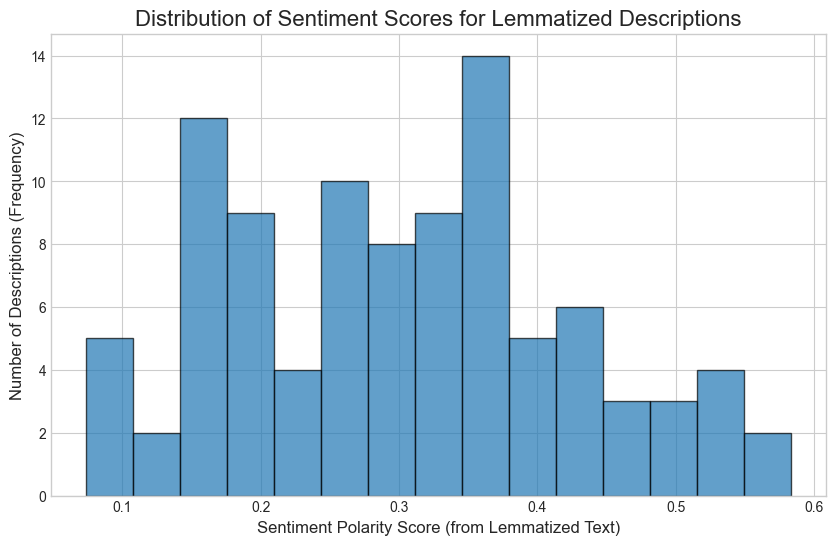

In [ ]:

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

# Load the spaCy model for lemmatization
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("spaCy model 'en_core_web_sm' not found.")
    print("Please run: !python -m spacy download en_core_web_sm")
    nlp = None

# A list to hold the polarity score of each lemmatized description
lemmatized_scores = []

if nlp:
    try:
        # --- Step 1: Read and parse the HTML file ---
        with open(html_file_path, 'r', encoding='utf-8') as f:
            html_content = f.read()
        
        soup = BeautifulSoup(html_content, 'html.parser')

        # --- Step 2: Find all product entries ---
        product_entries = soup.find_all('div', class_='product-entry')
        
        # --- Step 3: Lemmatize and score each description ---
        for entry in product_entries:
            description_tag = entry.find('p')
            if description_tag:
                original_text = description_tag.get_text()
                
                # Process the original text with spaCy
                doc = nlp(original_text)
                
                # Create a list of lemmas
                lemmas = [token.lemma_ for token in doc]
                
                # Join the lemmas back into a single string
                lemmatized_text = ' '.join(lemmas)
                
                # Perform sentiment analysis on the lemmatized text
                blob = TextBlob(lemmatized_text)
                lemmatized_scores.append(blob.sentiment.polarity)

        # --- Step 4: Plot a histogram of the scores ---
        if lemmatized_scores:
            plt.style.use('seaborn-v0_8-whitegrid')
            plt.figure(figsize=(10, 6))
            
            plt.hist(lemmatized_scores, bins=15, edgecolor='black', alpha=0.7)
            
            plt.title('Distribution of Sentiment Scores for Lemmatized Descriptions', fontsize=16)
            plt.xlabel('Sentiment Polarity Score (from Lemmatized Text)', fontsize=12)
            plt.ylabel('Number of Descriptions (Frequency)', fontsize=12)
            
            plt.show()
        else:
            print("No descriptions were found to analyze.")

    except FileNotFoundError:
        print(f"Error: The file was not found at the specified path: {html_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Analysis of the histogram:
# The histogram shows that the sentiment of the lemmatized text somewhat positive.
# The most common range of scores is between approximately 0.25 and 0.4. 



7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.5
* Cutoff Score (lemmas): 0.5

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [5]:

# Define the full path to your HTML file
html_file_path = r'nick-kuchar_titles_and_descriptions.html'

# Set the sentiment cutoff score
CUTOFF_SCORE = 0.5

# This list will hold the text of the cleaned descriptions that meet the criteria
summary_list = []

try:
    # --- Step 1: Read and parse the HTML file ---
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')

    # --- Step 2: Find all product entries ---
    product_entries = soup.find_all('div', class_='product-entry')
    
    # --- Step 3: Clean, analyze, and filter each description ---
    for entry in product_entries:
        description_tag = entry.find('p')
        if description_tag:
            # Get the full text of the description
            original_text = description_tag.get_text(separator=' ', strip=True)
            
            # --- MODIFICATION: Clean the text by removing the boilerplate ---
            # Find the start of the boilerplate section (case-insensitive)
            split_point = original_text.upper().find('ABOUT THE PRINT')
            
            # If the boilerplate is found, keep only the text before it
            if split_point != -1:
                cleaned_text = original_text[:split_point].strip()
            else:
                cleaned_text = original_text
            
            # Analyze the sentiment of the *cleaned* description
            blob = TextBlob(cleaned_text)
            
            # If the score is high enough, add the cleaned text to our summary list
            if blob.sentiment.polarity > CUTOFF_SCORE:
                summary_list.append(cleaned_text)

    # --- Step 4: Join the selected descriptions into a single summary and print ---
    if summary_list:
        summary_text = ' '.join(summary_list)
        
        print(f"Cleaned Article Summary (from descriptions with sentiment > {CUTOFF_SCORE}):")
        print("----------------------------------------------------------------------")
        print(summary_text)
    else:
        print(f"No descriptions were found with a sentiment score greater than {CUTOFF_SCORE} after cleaning.")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {html_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Cleaned Article Summary (from descriptions with sentiment > 0.5):
----------------------------------------------------------------------
On the north shore of Kaua‘i sits beautiful Hanalei Town.  A great town to paddle out for a surf, soak up the local culture or spend time on your way to the Nā Pali coast.
Nick's Commentary: "This is one the of most beautiful places on earth. The pier that juts out to sea is so iconic.  Whether looking makai at the expansive Hanalei Bay or mauka at the lush mountain ridges I love taking in the views of this place." Windward showers create spontaneous waterfalls along the Ko‘olau Mountain range's lush and magnificent mountain ridges. Hop on a boat or paddle board and cruise out to Ahu O Laka, the island off the coast of windward Oahu.  Also known as the Kāneʻohe Bay Sandbar, this spot is both scenic and spectacular. When the Sheraton Kona was being built in the 70's the construction lights attracted plankton which in turn attracted large Manta Rays clo

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [6]:

# Check if the summary_text variable exists and is not empty
if 'summary_text' in locals() and summary_text:
    # --- Step 1: Analyze the existing summary text ---
    print("Analyzing the 'summary_text' variable from the previous cell...")
    
    # Create a TextBlob object from the summary string
    summary_blob = TextBlob(summary_text)
    
    # Calculate the overall polarity of the summary
    summary_polarity = summary_blob.sentiment.polarity
    
    # Count the number of sentences in the summary
    num_sentences = len(summary_blob.sentences)
    
    # --- Step 2: Print the analysis results ---
    print(f"Polarity Score of the Generated Summary: {summary_polarity:.4f}")
    print(f"Number of Sentences in the Summary: {num_sentences}")
    
else:
    print("Error: The 'summary_text' variable was not found or is empty.")
    print("Please ensure the previous cell that generates the summary has been run successfully.")


Analyzing the 'summary_text' variable from the previous cell...
Polarity Score of the Generated Summary: 0.6044
Number of Sentences in the Summary: 39


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?